In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata

adata = anndata.read_h5ad("../data/scRNA/raw/bowel_disease.h5ad")

In [3]:
# get a subsampke of 1000 random cells
import numpy as np

np.random.seed(0)
adata = adata[np.random.choice(adata.obs.index, 1000, replace=False), :]

In [16]:
from adata_hf_datasets.initial_embedder import InitialEmbedder

embedder = InitialEmbedder(method="geneformer")
embedder.embed(adata)

/Users/mengerj/repos/adata_hf_datasets/.venv/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:818: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(


  0%|          | 0/32 [00:00<?, ?it/s]

Killing process python3.12 (PID 3438)


In [18]:
adata.obsm["X_pp"]

array([[-0.04990999,  0.022715  ,  0.00483826, ...,  0.04112426,
         0.00349349, -0.02908035],
       [-0.06825909,  0.02764852,  0.00272374, ...,  0.01670706,
         0.03077997, -0.03321787],
       [-0.07832119,  0.04038095,  0.00607401, ..., -0.04295109,
         0.08800988, -0.01885646],
       ...,
       [-0.06068312,  0.03089773,  0.00756257, ...,  0.00417979,
         0.04312574, -0.04143488],
       [ 0.00397647, -0.0956601 , -0.00229977, ...,  0.04615694,
         0.04894967,  0.08722678],
       [-0.06993881,  0.04138133,  0.00429048, ..., -0.00950405,
         0.04793736, -0.03061437]], dtype=float32)

In [19]:
adata

AnnData object with n_obs × n_vars = 1000 × 58690
    obs: 'sample_id', 'replicate', 'condition', 'leiden', 'cluster_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'sample_index'
    var: 'gene_name', 'log1p_normalizer', 'ensembl_id', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'dataset_name', 'log1p', 'model_name', 'terms'
    obsm: 'X_cellwhisperer_umap', 'top_genes', 'transcriptome_embeds', 'X_pp'

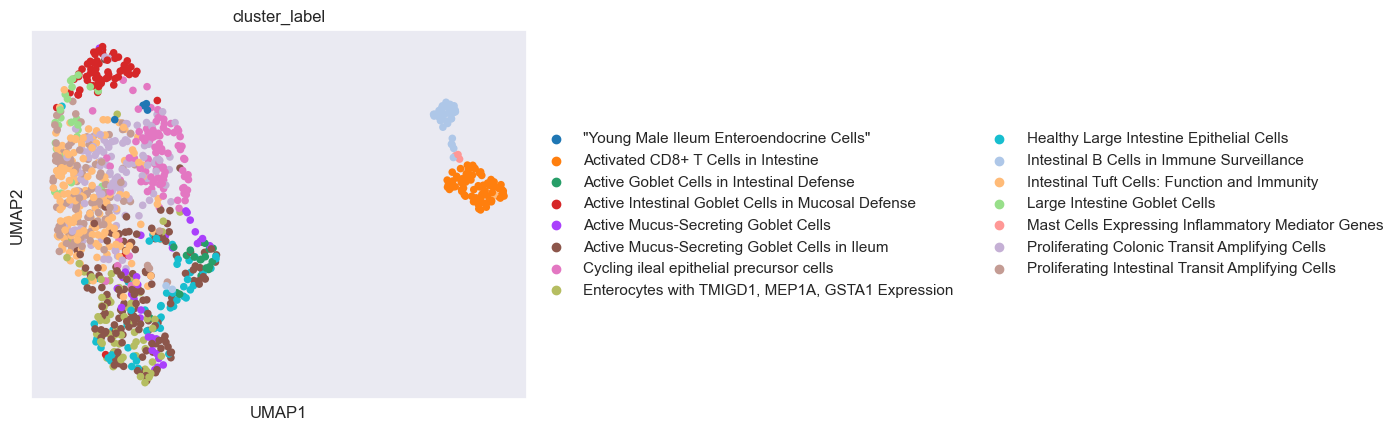

In [22]:
import scanpy as sc

sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="cluster_label")